In [ ]:
import torch

In [ ]:
def print_val(val):
  print("Type: ", type(val))
  print("Shape: ", val.shape)
  print("값: ")
  print(val)

In [ ]:
x = torch.rand(2,3,2) #uniform: 0~1 사이 모든 값들이 나올 확률이 같음
print_val(x)

x = torch.randn(2,3) # Gaussian: 0을 평균으로 하는 가우시안 분포를 따르는 랜덤값
print_val(x)

Type:  <class 'torch.Tensor'>
Shape:  torch.Size([2, 3, 2])
값: 
tensor([[[0.0636, 0.9649],
         [0.1473, 0.8223],
         [0.3580, 0.4897]],

        [[0.1860, 0.7861],
         [0.1456, 0.8820],
         [0.4891, 0.2867]]])
Type:  <class 'torch.Tensor'>
Shape:  torch.Size([2, 3])
값: 
tensor([[ 0.7855, -1.8070, -0.8095],
        [ 0.0686, -0.7149, -0.7377]])


In [ ]:
x = torch.randperm(4) # 0~n-1까지 값을원소로 갖는 배열 -> 랜덤 배열
print_val(x)

Type:  <class 'torch.Tensor'>
Shape:  torch.Size([4])
값: 
tensor([3, 0, 1, 2])


In [ ]:
# [start, end] 구간을 step 단위로 나눠서 배열로 생성
x = torch.arange(0, 3, step=0.5)
print_val(x)

Type:  <class 'torch.Tensor'>
Shape:  torch.Size([6])
값: 
tensor([0.0000, 0.5000, 1.0000, 1.5000, 2.0000, 2.5000])


In [ ]:
print_val(torch.ones(3,4))
print_val(torch.zeros(3,4))

Type:  <class 'torch.Tensor'>
Shape:  torch.Size([3, 4])
값: 
tensor([[1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.]])
Type:  <class 'torch.Tensor'>
Shape:  torch.Size([3, 4])
값: 
tensor([[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]])


In [ ]:
print_val(torch.Tensor(2,4))

Type:  <class 'torch.Tensor'>
Shape:  torch.Size([2, 4])
값: 
tensor([[4.0873e+08, 3.0852e-41, 3.7835e-44, 0.0000e+00],
        [       nan, 6.4460e-44, 1.3733e-14, 6.4069e+02]])


In [ ]:
print_val(torch.Tensor([2,3]))
print_val(torch.Tensor([[2,3], [3,4]]))

Type:  <class 'torch.Tensor'>
Shape:  torch.Size([2])
값: 
tensor([2., 3.])
Type:  <class 'torch.Tensor'>
Shape:  torch.Size([2, 2])
값: 
tensor([[2., 3.],
        [3., 4.]])


In [ ]:
#텐서 타입 변환
x = torch.FloatTensor(2,3)
print_val(x)

x = x.type_as(torch.IntTensor())
print_val(x)

Type:  <class 'torch.Tensor'>
Shape:  torch.Size([2, 3])
값: 
tensor([[7.5868e+08, 3.0852e-41, 3.9236e-44],
        [0.0000e+00,        nan, 0.0000e+00]])
Type:  <class 'torch.Tensor'>
Shape:  torch.Size([2, 3])
값: 
tensor([[  758677504,           0,           0],
        [          0, -2147483648,           0]], dtype=torch.int32)


In [ ]:
#텐서 크기 반환
torch.FloatTensor(3,4,5).size()

torch.Size([3, 4, 5])

In [ ]:
# numpy array -> torch tensor
import numpy as np
np_x = np.ndarray((2,3), dtype=int)
print_val(np_x)

x = torch.from_numpy(np_x)
print_val(x)

Type:  <class 'numpy.ndarray'>
Shape:  (2, 3)
값: 
[[94563606602400              0              0]
 [             0              0              0]]
Type:  <class 'torch.Tensor'>
Shape:  torch.Size([2, 3])
값: 
tensor([[94563606602400,              0,              0],
        [             0,              0,              0]])


## MNIST DATA

In [ ]:
import torchvision.datasets as dset
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
from torch.autograd import Variable
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
# 1. MNIST 로드
mnist_train = dset.MNIST("", train=True, transform=transforms.ToTensor(), target_transform=None, download=True)


Failed to download (trying next):
HTTP Error 503: Service Unavailable




Extracting MNIST/raw/train-images-idx3-ubyte.gz to MNIST/raw

Failed to download (trying next):
HTTP Error 503: Service Unavailable




Extracting MNIST/raw/train-labels-idx1-ubyte.gz to MNIST/raw

Failed to download (trying next):
HTTP Error 503: Service Unavailable




Extracting MNIST/raw/t10k-images-idx3-ubyte.gz to MNIST/raw

Failed to download (trying next):
HTTP Error 503: Service Unavailable




Extracting MNIST/raw/t10k-labels-idx1-ubyte.gz to MNIST/raw



/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:498: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:180.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


torch.Size([1, 28, 28]) 5
torch.Size([1, 28, 28]) 0
60000
mnist_train 길이:  60000
5
torch.Size([1, 28, 28])


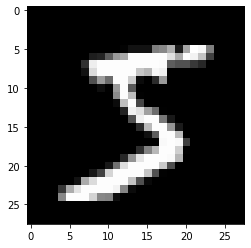

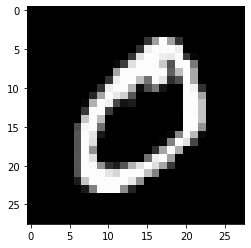

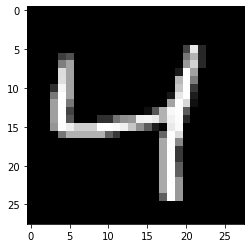

In [ ]:
# 2. 그려보기
# MNIST data 하나 형태 출력
image, label = mnist_train.__getitem__(0)
print (image.size(), label)

image, label = mnist_train[1]
print(image.size(), label)

print (mnist_train.__len__())
print("mnist_train 길이: ", len(mnist_train))

#그리기
print(mnist_train[0][1]) # label
print(mnist_train[0][0].size()) #image

for i in range(3):
  img = mnist_train[i][0].numpy() #image 타입을 numpy로 변환
  #plt.title("label:" %d" %mnist_train[i][1])
  plt.imshow(img[0], cmap='gray')
  plt.show()